In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import transforms
import torchvision
import torch.optim as optim
import pytorch_lightning as pl
import copy
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
import torchmetrics
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device=torch.device("cpu")
print(device)

cuda:0


In [3]:
classes=['Covid','No Covid']
num_classes=2
batch_size=4

In [4]:
dataset = torchvision.datasets.ImageFolder(root="./data",transform=transforms.Compose([
                                                            transforms.ToTensor(),
                                                            transforms.Resize([227,227]),
#                                                             transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                                                            ]))

In [5]:
print(len(dataset))
trainset,testset=torch.utils.data.random_split(dataset,[round(0.8*len(dataset)),round(0.2*len(dataset))],generator=torch.Generator().manual_seed(42))
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False)

8088


In [6]:
class CNN(nn.Module):
    def get_first_FC_Layer(self,x):
            x=self.representation_network(x).flatten(1)
            x=self.classification_network[0](x)
            return x;
    def get_Representation_Net(self,x):
            x=self.representation_network(x).flatten(1)
            return  x;
    def __init__(self):
        super(CNN,self).__init__()
        self.representation_network=nn.Sequential(
            nn.Conv2d(3,32,3), 
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=2,stride=3),
            nn.Conv2d(32,32,3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=3),
        )
        self.classification_network=nn.Sequential(
            nn.Linear(18432,512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Linear(128,1)
#             nn.Sigmoid()
        )
    def forward(self,x):
#         print(x.shape)
        x=self.representation_network(x)
#         print(x.shape)
        # flattening of the vector=> same dimension of first index(batch size) , everythign else is flattened(-1)
        x=x.view(x.size(0),-1)
#         print(x.shape)
        x=self.classification_network(x)
#         print(x.shape)
        return x

In [7]:
net = CNN()
net.load_state_dict(torch.load("CNN-3_final.pth").state_dict())

<All keys matched successfully>

In [8]:
X_Train=np.empty((0,512))
Y_Train=np.empty((0,batch_size))
print(X_Train.shape)
for i,data in enumerate(trainloader):
    print(f'Done with the batch: {i}')
    images,labels=data
    FCLayer=net.get_first_FC_Layer(images).detach().numpy();
#     print(FCLayer,FCLayer.shape,labels.numpy())
    X_Train=np.append(X_Train,FCLayer,axis=0)
    Y_Train=np.append(Y_Train,labels.numpy())
print(X_Train.shape,Y_Train.shape)

(0, 512)
Done with the batch: 0
Done with the batch: 1
Done with the batch: 2
Done with the batch: 3
Done with the batch: 4
Done with the batch: 5
Done with the batch: 6
Done with the batch: 7
Done with the batch: 8
Done with the batch: 9
Done with the batch: 10
Done with the batch: 11
Done with the batch: 12
Done with the batch: 13
Done with the batch: 14
Done with the batch: 15
Done with the batch: 16
Done with the batch: 17
Done with the batch: 18
Done with the batch: 19
Done with the batch: 20
Done with the batch: 21
Done with the batch: 22
Done with the batch: 23
Done with the batch: 24
Done with the batch: 25
Done with the batch: 26
Done with the batch: 27
Done with the batch: 28
Done with the batch: 29
Done with the batch: 30
Done with the batch: 31
Done with the batch: 32
Done with the batch: 33
Done with the batch: 34
Done with the batch: 35
Done with the batch: 36
Done with the batch: 37
Done with the batch: 38
Done with the batch: 39
Done with the batch: 40
Done with the bat

Done with the batch: 332
Done with the batch: 333
Done with the batch: 334
Done with the batch: 335
Done with the batch: 336
Done with the batch: 337
Done with the batch: 338
Done with the batch: 339
Done with the batch: 340
Done with the batch: 341
Done with the batch: 342
Done with the batch: 343
Done with the batch: 344
Done with the batch: 345
Done with the batch: 346
Done with the batch: 347
Done with the batch: 348
Done with the batch: 349
Done with the batch: 350
Done with the batch: 351
Done with the batch: 352
Done with the batch: 353
Done with the batch: 354
Done with the batch: 355
Done with the batch: 356
Done with the batch: 357
Done with the batch: 358
Done with the batch: 359
Done with the batch: 360
Done with the batch: 361
Done with the batch: 362
Done with the batch: 363
Done with the batch: 364
Done with the batch: 365
Done with the batch: 366
Done with the batch: 367
Done with the batch: 368
Done with the batch: 369
Done with the batch: 370
Done with the batch: 371


Done with the batch: 661
Done with the batch: 662
Done with the batch: 663
Done with the batch: 664
Done with the batch: 665
Done with the batch: 666
Done with the batch: 667
Done with the batch: 668
Done with the batch: 669
Done with the batch: 670
Done with the batch: 671
Done with the batch: 672
Done with the batch: 673
Done with the batch: 674
Done with the batch: 675
Done with the batch: 676
Done with the batch: 677
Done with the batch: 678
Done with the batch: 679
Done with the batch: 680
Done with the batch: 681
Done with the batch: 682
Done with the batch: 683
Done with the batch: 684
Done with the batch: 685
Done with the batch: 686
Done with the batch: 687
Done with the batch: 688
Done with the batch: 689
Done with the batch: 690
Done with the batch: 691
Done with the batch: 692
Done with the batch: 693
Done with the batch: 694
Done with the batch: 695
Done with the batch: 696
Done with the batch: 697
Done with the batch: 698
Done with the batch: 699
Done with the batch: 700


Done with the batch: 989
Done with the batch: 990
Done with the batch: 991
Done with the batch: 992
Done with the batch: 993
Done with the batch: 994
Done with the batch: 995
Done with the batch: 996
Done with the batch: 997
Done with the batch: 998
Done with the batch: 999
Done with the batch: 1000
Done with the batch: 1001
Done with the batch: 1002
Done with the batch: 1003
Done with the batch: 1004
Done with the batch: 1005
Done with the batch: 1006
Done with the batch: 1007
Done with the batch: 1008
Done with the batch: 1009
Done with the batch: 1010
Done with the batch: 1011
Done with the batch: 1012
Done with the batch: 1013
Done with the batch: 1014
Done with the batch: 1015
Done with the batch: 1016
Done with the batch: 1017
Done with the batch: 1018
Done with the batch: 1019
Done with the batch: 1020
Done with the batch: 1021
Done with the batch: 1022
Done with the batch: 1023
Done with the batch: 1024
Done with the batch: 1025
Done with the batch: 1026
Done with the batch: 10

Done with the batch: 1307
Done with the batch: 1308
Done with the batch: 1309
Done with the batch: 1310
Done with the batch: 1311
Done with the batch: 1312
Done with the batch: 1313
Done with the batch: 1314
Done with the batch: 1315
Done with the batch: 1316
Done with the batch: 1317
Done with the batch: 1318
Done with the batch: 1319
Done with the batch: 1320
Done with the batch: 1321
Done with the batch: 1322
Done with the batch: 1323
Done with the batch: 1324
Done with the batch: 1325
Done with the batch: 1326
Done with the batch: 1327
Done with the batch: 1328
Done with the batch: 1329
Done with the batch: 1330
Done with the batch: 1331
Done with the batch: 1332
Done with the batch: 1333
Done with the batch: 1334
Done with the batch: 1335
Done with the batch: 1336
Done with the batch: 1337
Done with the batch: 1338
Done with the batch: 1339
Done with the batch: 1340
Done with the batch: 1341
Done with the batch: 1342
Done with the batch: 1343
Done with the batch: 1344
Done with th

In [9]:
X_Test=np.empty((0,512))
Y_Test=np.empty((0,batch_size))
print(X_Test.shape)
for i,data in enumerate(testloader):
    print(f'Done with the batch: {i}')
    images,labels=data
    FCLayer=net.get_first_FC_Layer(images).detach().numpy();
#     print(FCLayer,FCLayer.shape,labels.numpy())
    X_Test=np.append(X_Test,FCLayer,axis=0)
    Y_Test=np.append(Y_Test,labels.numpy())
print(X_Test.shape,Y_Test.shape)

(0, 512)
Done with the batch: 0
Done with the batch: 1
Done with the batch: 2
Done with the batch: 3
Done with the batch: 4
Done with the batch: 5
Done with the batch: 6
Done with the batch: 7
Done with the batch: 8
Done with the batch: 9
Done with the batch: 10
Done with the batch: 11
Done with the batch: 12
Done with the batch: 13
Done with the batch: 14
Done with the batch: 15
Done with the batch: 16
Done with the batch: 17
Done with the batch: 18
Done with the batch: 19
Done with the batch: 20
Done with the batch: 21
Done with the batch: 22
Done with the batch: 23
Done with the batch: 24
Done with the batch: 25
Done with the batch: 26
Done with the batch: 27
Done with the batch: 28
Done with the batch: 29
Done with the batch: 30
Done with the batch: 31
Done with the batch: 32
Done with the batch: 33
Done with the batch: 34
Done with the batch: 35
Done with the batch: 36
Done with the batch: 37
Done with the batch: 38
Done with the batch: 39
Done with the batch: 40
Done with the bat

Done with the batch: 332
Done with the batch: 333
Done with the batch: 334
Done with the batch: 335
Done with the batch: 336
Done with the batch: 337
Done with the batch: 338
Done with the batch: 339
Done with the batch: 340
Done with the batch: 341
Done with the batch: 342
Done with the batch: 343
Done with the batch: 344
Done with the batch: 345
Done with the batch: 346
Done with the batch: 347
Done with the batch: 348
Done with the batch: 349
Done with the batch: 350
Done with the batch: 351
Done with the batch: 352
Done with the batch: 353
Done with the batch: 354
Done with the batch: 355
Done with the batch: 356
Done with the batch: 357
Done with the batch: 358
Done with the batch: 359
Done with the batch: 360
Done with the batch: 361
Done with the batch: 362
Done with the batch: 363
Done with the batch: 364
Done with the batch: 365
Done with the batch: 366
Done with the batch: 367
Done with the batch: 368
Done with the batch: 369
Done with the batch: 370
Done with the batch: 371


## Getting the feature map

In [10]:
%%notify -m "Completed"
X_Train_FeatureMap=np.empty((0,18432))
Y_Train_FeatureMap=np.empty((0,batch_size))
print(X_Train_FeatureMap.shape)
for i,data in enumerate(trainloader):
    print(f'Done with the batch: {i}')
    images,labels=data
    featureMap=net.get_Representation_Net(images).detach().numpy();
#     print(FCLayer,FCLayer.shape,labels.numpy())
    X_Train_FeatureMap=np.append(X_Train_FeatureMap,featureMap,axis=0)
    Y_Train_FeatureMap=np.append(Y_Train_FeatureMap,labels.numpy())
print(X_Train_FeatureMap.shape,Y_Train_FeatureMap.shape)

(0, 18432)
Done with the batch: 0
Done with the batch: 1
Done with the batch: 2
Done with the batch: 3
Done with the batch: 4
Done with the batch: 5
Done with the batch: 6
Done with the batch: 7
Done with the batch: 8
Done with the batch: 9
Done with the batch: 10
Done with the batch: 11
Done with the batch: 12
Done with the batch: 13
Done with the batch: 14
Done with the batch: 15
Done with the batch: 16
Done with the batch: 17
Done with the batch: 18
Done with the batch: 19
Done with the batch: 20
Done with the batch: 21
Done with the batch: 22
Done with the batch: 23
Done with the batch: 24
Done with the batch: 25
Done with the batch: 26
Done with the batch: 27
Done with the batch: 28
Done with the batch: 29
Done with the batch: 30
Done with the batch: 31
Done with the batch: 32
Done with the batch: 33
Done with the batch: 34
Done with the batch: 35
Done with the batch: 36
Done with the batch: 37
Done with the batch: 38
Done with the batch: 39
Done with the batch: 40
Done with the b

Done with the batch: 332
Done with the batch: 333
Done with the batch: 334
Done with the batch: 335
Done with the batch: 336
Done with the batch: 337
Done with the batch: 338
Done with the batch: 339
Done with the batch: 340
Done with the batch: 341
Done with the batch: 342
Done with the batch: 343
Done with the batch: 344
Done with the batch: 345
Done with the batch: 346
Done with the batch: 347
Done with the batch: 348
Done with the batch: 349
Done with the batch: 350
Done with the batch: 351
Done with the batch: 352
Done with the batch: 353
Done with the batch: 354
Done with the batch: 355
Done with the batch: 356
Done with the batch: 357
Done with the batch: 358
Done with the batch: 359
Done with the batch: 360
Done with the batch: 361
Done with the batch: 362
Done with the batch: 363
Done with the batch: 364
Done with the batch: 365
Done with the batch: 366
Done with the batch: 367
Done with the batch: 368
Done with the batch: 369
Done with the batch: 370
Done with the batch: 371


Done with the batch: 660
Done with the batch: 661
Done with the batch: 662
Done with the batch: 663
Done with the batch: 664
Done with the batch: 665
Done with the batch: 666
Done with the batch: 667
Done with the batch: 668
Done with the batch: 669
Done with the batch: 670
Done with the batch: 671
Done with the batch: 672
Done with the batch: 673
Done with the batch: 674
Done with the batch: 675
Done with the batch: 676
Done with the batch: 677
Done with the batch: 678
Done with the batch: 679
Done with the batch: 680
Done with the batch: 681
Done with the batch: 682
Done with the batch: 683
Done with the batch: 684
Done with the batch: 685
Done with the batch: 686
Done with the batch: 687
Done with the batch: 688
Done with the batch: 689
Done with the batch: 690
Done with the batch: 691
Done with the batch: 692
Done with the batch: 693
Done with the batch: 694
Done with the batch: 695
Done with the batch: 696
Done with the batch: 697
Done with the batch: 698
Done with the batch: 699


Done with the batch: 988
Done with the batch: 989
Done with the batch: 990
Done with the batch: 991
Done with the batch: 992
Done with the batch: 993
Done with the batch: 994
Done with the batch: 995
Done with the batch: 996
Done with the batch: 997
Done with the batch: 998
Done with the batch: 999
Done with the batch: 1000
Done with the batch: 1001
Done with the batch: 1002
Done with the batch: 1003
Done with the batch: 1004
Done with the batch: 1005
Done with the batch: 1006
Done with the batch: 1007
Done with the batch: 1008
Done with the batch: 1009
Done with the batch: 1010
Done with the batch: 1011
Done with the batch: 1012
Done with the batch: 1013
Done with the batch: 1014
Done with the batch: 1015
Done with the batch: 1016
Done with the batch: 1017
Done with the batch: 1018
Done with the batch: 1019
Done with the batch: 1020
Done with the batch: 1021
Done with the batch: 1022
Done with the batch: 1023
Done with the batch: 1024
Done with the batch: 1025
Done with the batch: 102

Done with the batch: 1304
Done with the batch: 1305
Done with the batch: 1306
Done with the batch: 1307
Done with the batch: 1308
Done with the batch: 1309
Done with the batch: 1310
Done with the batch: 1311
Done with the batch: 1312
Done with the batch: 1313
Done with the batch: 1314
Done with the batch: 1315
Done with the batch: 1316
Done with the batch: 1317
Done with the batch: 1318
Done with the batch: 1319
Done with the batch: 1320
Done with the batch: 1321
Done with the batch: 1322
Done with the batch: 1323
Done with the batch: 1324
Done with the batch: 1325
Done with the batch: 1326
Done with the batch: 1327
Done with the batch: 1328
Done with the batch: 1329
Done with the batch: 1330
Done with the batch: 1331
Done with the batch: 1332
Done with the batch: 1333
Done with the batch: 1334
Done with the batch: 1335
Done with the batch: 1336
Done with the batch: 1337
Done with the batch: 1338
Done with the batch: 1339
Done with the batch: 1340
Done with the batch: 1341
Done with th

<IPython.core.display.Javascript object>

In [11]:
%%notify -m "Completed"
X_Test_FeatureMap=np.empty((0,18432))
Y_Test_FeatureMap=np.empty((0,batch_size))
print(X_Test_FeatureMap.shape)
for i,data in enumerate(testloader):
    print(f'Done with the batch: {i}')
    images,labels=data
    featuremap=net.get_Representation_Net(images).detach().numpy();
#     print(FCLayer,FCLayer.shape,labels.numpy())
    X_Test_FeatureMap=np.append(X_Test_FeatureMap,featuremap,axis=0)
    Y_Test_FeatureMap=np.append(Y_Test_FeatureMap,labels.numpy())
print(X_Test_FeatureMap.shape,Y_Test_FeatureMap.shape)

(0, 18432)
Done with the batch: 0
Done with the batch: 1
Done with the batch: 2
Done with the batch: 3
Done with the batch: 4
Done with the batch: 5
Done with the batch: 6
Done with the batch: 7
Done with the batch: 8
Done with the batch: 9
Done with the batch: 10
Done with the batch: 11
Done with the batch: 12
Done with the batch: 13
Done with the batch: 14
Done with the batch: 15
Done with the batch: 16
Done with the batch: 17
Done with the batch: 18
Done with the batch: 19
Done with the batch: 20
Done with the batch: 21
Done with the batch: 22
Done with the batch: 23
Done with the batch: 24
Done with the batch: 25
Done with the batch: 26
Done with the batch: 27
Done with the batch: 28
Done with the batch: 29
Done with the batch: 30
Done with the batch: 31
Done with the batch: 32
Done with the batch: 33
Done with the batch: 34
Done with the batch: 35
Done with the batch: 36
Done with the batch: 37
Done with the batch: 38
Done with the batch: 39
Done with the batch: 40
Done with the b

Done with the batch: 332
Done with the batch: 333
Done with the batch: 334
Done with the batch: 335
Done with the batch: 336
Done with the batch: 337
Done with the batch: 338
Done with the batch: 339
Done with the batch: 340
Done with the batch: 341
Done with the batch: 342
Done with the batch: 343
Done with the batch: 344
Done with the batch: 345
Done with the batch: 346
Done with the batch: 347
Done with the batch: 348
Done with the batch: 349
Done with the batch: 350
Done with the batch: 351
Done with the batch: 352
Done with the batch: 353
Done with the batch: 354
Done with the batch: 355
Done with the batch: 356
Done with the batch: 357
Done with the batch: 358
Done with the batch: 359
Done with the batch: 360
Done with the batch: 361
Done with the batch: 362
Done with the batch: 363
Done with the batch: 364
Done with the batch: 365
Done with the batch: 366
Done with the batch: 367
Done with the batch: 368
Done with the batch: 369
Done with the batch: 370
Done with the batch: 371


<IPython.core.display.Javascript object>

## SVM

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score,recall_score
from sklearn.model_selection import KFold

In [13]:
tuned_parameters = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-2,0.1,1,10],
                     'C': [0.001,0.1,1, 10, 100],
}
# tuned_parameters = {'kernel': ['rbf'], 'gamma': [1e-3],
#                      'C': [0.001],
#                    }
clf = GridSearchCV(
        SVC(), tuned_parameters, scoring= 'accuracy',verbose=10
    )
clf.fit(X_Train, Y_Train.ravel())

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START C=0.001, gamma=0.001, kernel=rbf...........................
[CV 1/5; 1/25] END C=0.001, gamma=0.001, kernel=rbf;, score=0.512 total time=  10.3s
[CV 2/5; 1/25] START C=0.001, gamma=0.001, kernel=rbf...........................
[CV 2/5; 1/25] END C=0.001, gamma=0.001, kernel=rbf;, score=0.517 total time=  10.1s
[CV 3/5; 1/25] START C=0.001, gamma=0.001, kernel=rbf...........................
[CV 3/5; 1/25] END C=0.001, gamma=0.001, kernel=rbf;, score=0.523 total time=  10.0s
[CV 4/5; 1/25] START C=0.001, gamma=0.001, kernel=rbf...........................
[CV 4/5; 1/25] END C=0.001, gamma=0.001, kernel=rbf;, score=0.512 total time=  10.0s
[CV 5/5; 1/25] START C=0.001, gamma=0.001, kernel=rbf...........................
[CV 5/5; 1/25] END C=0.001, gamma=0.001, kernel=rbf;, score=0.521 total time=  10.2s
[CV 1/5; 2/25] START C=0.001, gamma=0.01, kernel=rbf............................
[CV 1/5; 2/25] END C=0.001,

[CV 1/5; 11/25] END C=1, gamma=0.001, kernel=rbf;, score=0.965 total time=   2.9s
[CV 2/5; 11/25] START C=1, gamma=0.001, kernel=rbf..............................
[CV 2/5; 11/25] END C=1, gamma=0.001, kernel=rbf;, score=0.959 total time=   9.2s
[CV 3/5; 11/25] START C=1, gamma=0.001, kernel=rbf..............................
[CV 3/5; 11/25] END C=1, gamma=0.001, kernel=rbf;, score=0.970 total time=   8.7s
[CV 4/5; 11/25] START C=1, gamma=0.001, kernel=rbf..............................
[CV 4/5; 11/25] END C=1, gamma=0.001, kernel=rbf;, score=0.965 total time=   8.3s
[CV 5/5; 11/25] START C=1, gamma=0.001, kernel=rbf..............................
[CV 5/5; 11/25] END C=1, gamma=0.001, kernel=rbf;, score=0.967 total time=   8.4s
[CV 1/5; 12/25] START C=1, gamma=0.01, kernel=rbf...............................
[CV 1/5; 12/25] END C=1, gamma=0.01, kernel=rbf;, score=0.924 total time=  30.7s
[CV 2/5; 12/25] START C=1, gamma=0.01, kernel=rbf...............................
[CV 2/5; 12/25] END C=1

[CV 2/5; 21/25] END C=100, gamma=0.001, kernel=rbf;, score=0.955 total time=   7.2s
[CV 3/5; 21/25] START C=100, gamma=0.001, kernel=rbf............................
[CV 3/5; 21/25] END C=100, gamma=0.001, kernel=rbf;, score=0.956 total time=   7.2s
[CV 4/5; 21/25] START C=100, gamma=0.001, kernel=rbf............................
[CV 4/5; 21/25] END C=100, gamma=0.001, kernel=rbf;, score=0.963 total time=   7.3s
[CV 5/5; 21/25] START C=100, gamma=0.001, kernel=rbf............................
[CV 5/5; 21/25] END C=100, gamma=0.001, kernel=rbf;, score=0.958 total time=   7.2s
[CV 1/5; 22/25] START C=100, gamma=0.01, kernel=rbf.............................
[CV 1/5; 22/25] END C=100, gamma=0.01, kernel=rbf;, score=0.922 total time=  29.3s
[CV 2/5; 22/25] START C=100, gamma=0.01, kernel=rbf.............................
[CV 2/5; 22/25] END C=100, gamma=0.01, kernel=rbf;, score=0.905 total time=  29.3s
[CV 3/5; 22/25] START C=100, gamma=0.01, kernel=rbf.............................
[CV 3/5; 22/

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=10)

In [38]:
def k_fold_cv_svm(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
#         clf=SVC(C=10,kernel='rbf',gamma=0.0001)
        clf=SVC(C=10,kernel='rbf',gamma=10)
        clf.fit(X_train,y_train.ravel())
        y_pred = clf.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del clf
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return clf

In [15]:
clf=k_fold_cv_svm(X_Train,Y_Train.ravel())
clf=SVC(C=10,kernel='rbf',gamma=0.0001)
clf.fit(X_Train,Y_Train.ravel())
y_pred = clf.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 96.21329211746522
FOLD 1
--------------------------------
Accuracy: 94.97681607418856
FOLD 2
--------------------------------
Accuracy: 97.14064914992272
FOLD 3
--------------------------------
Accuracy: 96.29057187017001
FOLD 4
--------------------------------
Accuracy: 96.83153013910355
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 96.21329211746522 %
Fold 1: 94.97681607418856 %
Fold 2: 97.14064914992272 %
Fold 3: 96.29057187017001 %
Fold 4: 96.83153013910355 %
Average: 96.29057187017001 %
Accuracy:  0.9208899876390606
F1-Score:  0.921855921855922
Precision:  0.9207317073170732
Recall:  0.9229828850855746
AUC:  0.9208664425427873


## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
def k_fold_cv_dtree(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
        decision_tree = DecisionTreeClassifier(random_state=102)
        decision_tree = decision_tree.fit(X_train, y_train.ravel())
        y_pred = decision_tree.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del decision_tree
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return decision_tree

In [18]:
dtree=k_fold_cv_dtree(X_Train,Y_Train.ravel())
dtree = DecisionTreeClassifier(random_state=102)
dtree = dtree.fit(X_Train, Y_Train.ravel())
y_pred=dtree.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 93.19938176197836
FOLD 1
--------------------------------
Accuracy: 94.5904173106646
FOLD 2
--------------------------------
Accuracy: 93.81761978361669
FOLD 3
--------------------------------
Accuracy: 94.35857805255023
FOLD 4
--------------------------------
Accuracy: 93.50850077279753
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 93.19938176197836 %
Fold 1: 94.5904173106646 %
Fold 2: 93.81761978361669 %
Fold 3: 94.35857805255023 %
Fold 4: 93.50850077279753 %
Average: 93.89489953632149 %
Accuracy:  0.899876390605686
F1-Score:  0.9027611044417767
Precision:  0.8867924528301887
Recall:  0.9193154034229829
AUC:  0.8996577017114914


## XGBOOST

In [19]:
import xgboost as xgb

In [20]:
def k_fold_cv_xgb(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
        eval_set = [(X_train, y_train.ravel()), (X_test, y_test)]
        xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=102,use_label_encoder=False)
        xg_cl.fit(X_train,y_train.ravel())
        y_pred = xg_cl.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del xg_cl
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return xg_cl

In [21]:
xg=k_fold_cv_xgb(X_Train,Y_Train.ravel())
xg = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=102,use_label_encoder=False)
xg.fit(X_Train,Y_Train.ravel())
y_pred=xg.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test.ravel(),y_pred))

FOLD 0
--------------------------------
[14:43:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 96.59969088098919
FOLD 1
--------------------------------
[14:43:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 96.13601236476043
FOLD 2
--------------------------------
[14:44:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was

## MLP

In [22]:
from sklearn.neural_network import MLPClassifier

In [23]:
def k_fold_cv_mlp(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
        clf = MLPClassifier(random_state=102, max_iter=3000, verbose=True).fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del clf
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return clf

In [24]:
clf=k_fold_cv_mlp(X_Train,Y_Train.ravel())
clf=MLPClassifier(random_state=102, max_iter=3000, verbose=True).fit(X_Train, Y_Train.ravel())
y_pred=clf.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test.ravel(),y_pred))

FOLD 0
--------------------------------
Iteration 1, loss = 0.54862838
Iteration 2, loss = 0.20145201
Iteration 3, loss = 0.17676709
Iteration 4, loss = 0.15865270
Iteration 5, loss = 0.14569061
Iteration 6, loss = 0.13140744
Iteration 7, loss = 0.12309088
Iteration 8, loss = 0.11730934
Iteration 9, loss = 0.11303174
Iteration 10, loss = 0.10941145
Iteration 11, loss = 0.10460121
Iteration 12, loss = 0.10331378
Iteration 13, loss = 0.09842188
Iteration 14, loss = 0.09644764
Iteration 15, loss = 0.09052133
Iteration 16, loss = 0.09359614
Iteration 17, loss = 0.08805536
Iteration 18, loss = 0.08361891
Iteration 19, loss = 0.08307174
Iteration 20, loss = 0.08233506
Iteration 21, loss = 0.08170814
Iteration 22, loss = 0.08164868
Iteration 23, loss = 0.08355770
Iteration 24, loss = 0.07310964
Iteration 25, loss = 0.07461062
Iteration 26, loss = 0.07308495
Iteration 27, loss = 0.07384102
Iteration 28, loss = 0.07127505
Iteration 29, loss = 0.07095963
Iteration 30, loss = 0.06738504
Iteration

Iteration 63, loss = 0.05676613
Iteration 64, loss = 0.05247538
Iteration 65, loss = 0.05624558
Iteration 66, loss = 0.05187407
Iteration 67, loss = 0.05003512
Iteration 68, loss = 0.04841918
Iteration 69, loss = 0.05200677
Iteration 70, loss = 0.05461590
Iteration 71, loss = 0.06369813
Iteration 72, loss = 0.05742996
Iteration 73, loss = 0.05027307
Iteration 74, loss = 0.04646316
Iteration 75, loss = 0.04740301
Iteration 76, loss = 0.04880688
Iteration 77, loss = 0.05436594
Iteration 78, loss = 0.05224846
Iteration 79, loss = 0.04831154
Iteration 80, loss = 0.04495785
Iteration 81, loss = 0.04663157
Iteration 82, loss = 0.04556237
Iteration 83, loss = 0.04820973
Iteration 84, loss = 0.05078051
Iteration 85, loss = 0.05202978
Iteration 86, loss = 0.04605520
Iteration 87, loss = 0.04738584
Iteration 88, loss = 0.04406531
Iteration 89, loss = 0.04251847
Iteration 90, loss = 0.04495850
Iteration 91, loss = 0.04197180
Iteration 92, loss = 0.04411705
Iteration 93, loss = 0.04744805
Iteratio

Iteration 41, loss = 0.06368000
Iteration 42, loss = 0.06436388
Iteration 43, loss = 0.06449367
Iteration 44, loss = 0.06057242
Iteration 45, loss = 0.06026464
Iteration 46, loss = 0.05938903
Iteration 47, loss = 0.06253857
Iteration 48, loss = 0.05830020
Iteration 49, loss = 0.06135026
Iteration 50, loss = 0.05699039
Iteration 51, loss = 0.05463173
Iteration 52, loss = 0.05485185
Iteration 53, loss = 0.05645568
Iteration 54, loss = 0.05545418
Iteration 55, loss = 0.07629331
Iteration 56, loss = 0.05841932
Iteration 57, loss = 0.05389843
Iteration 58, loss = 0.05761762
Iteration 59, loss = 0.05715388
Iteration 60, loss = 0.05165050
Iteration 61, loss = 0.05971964
Iteration 62, loss = 0.06272465
Iteration 63, loss = 0.05438823
Iteration 64, loss = 0.05305028
Iteration 65, loss = 0.04757162
Iteration 66, loss = 0.05069938
Iteration 67, loss = 0.05009496
Iteration 68, loss = 0.05021030
Iteration 69, loss = 0.05337547
Iteration 70, loss = 0.05176444
Iteration 71, loss = 0.04634174
Iteratio

Iteration 120, loss = 0.04292267
Iteration 121, loss = 0.04305897
Iteration 122, loss = 0.04272387
Iteration 123, loss = 0.04150147
Iteration 124, loss = 0.03909700
Iteration 125, loss = 0.04716310
Iteration 126, loss = 0.04213437
Iteration 127, loss = 0.04833481
Iteration 128, loss = 0.04601542
Iteration 129, loss = 0.04079304
Iteration 130, loss = 0.03911799
Iteration 131, loss = 0.04463215
Iteration 132, loss = 0.05190130
Iteration 133, loss = 0.04381389
Iteration 134, loss = 0.04459000
Iteration 135, loss = 0.04155226
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy:  0.9264524103831892
F1-Score:  0.9280096793708409
Precision:  0.918562874251497
Recall:  0.9376528117359413
AUC:  0.9263264058679707


## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
def k_fold_cv_rforest(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
        random_forest = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=102)
        random_forest = random_forest.fit(X_train, y_train.ravel())
        y_pred = random_forest.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del random_forest
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return random_forest

In [27]:
random_forest=k_fold_cv_rforest(X_Train,Y_Train.ravel())
random_forest = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=102)
random_forest = random_forest.fit(X_Train, Y_Train.ravel())
y_pred=random_forest.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 95.6723338485317
FOLD 1
--------------------------------
Accuracy: 96.52241112828439
FOLD 2
--------------------------------
Accuracy: 96.21329211746522
FOLD 3
--------------------------------
Accuracy: 95.5950540958269
FOLD 4
--------------------------------
Accuracy: 96.90880989180835
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 95.6723338485317 %
Fold 1: 96.52241112828439 %
Fold 2: 96.21329211746522 %
Fold 3: 95.5950540958269 %
Fold 4: 96.90880989180835 %
Average: 96.18238021638331 %
Accuracy:  0.9184177997527813
F1-Score:  0.9201934703748489
Precision:  0.9102870813397129
Recall:  0.9303178484107579
AUC:  0.9182839242053789


## PCA

In [28]:
from sklearn.decomposition import KernelPCA

Text(0, 0.5, 'cumulative explained variance')

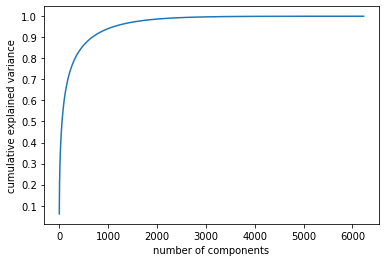

In [11]:
kpca = KernelPCA(kernel = 'rbf')
kpca_transform = kpca.fit_transform(X_Train_FeatureMap)
explained_variance = np.var(kpca_transform, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [29]:
kpca = KernelPCA(kernel = 'rbf',n_components=3500)
X_Train_Transformed_FeatureMap = kpca.fit_transform(X_Train_FeatureMap)
print(X_Train_Transformed_FeatureMap.shape)

(6470, 3500)


In [30]:
X_Test_Transformed_FeatureMap = kpca.transform(X_Test_FeatureMap)

print(X_Test_FeatureMap.shape,X_Test_Transformed_FeatureMap.shape)

(1618, 18432) (1618, 3500)


## SVM

In [40]:
clf=k_fold_cv_svm(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
clf=SVC(C=10,kernel='rbf',gamma=10)
clf.fit(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
y_pred=clf.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 92.19474497681608
FOLD 1
--------------------------------
Accuracy: 93.97217928902627
FOLD 2
--------------------------------
Accuracy: 93.74034003091191
FOLD 3
--------------------------------
Accuracy: 92.27202472952087
FOLD 4
--------------------------------
Accuracy: 91.80834621329211
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 92.19474497681608 %
Fold 1: 93.97217928902627 %
Fold 2: 93.74034003091191 %
Fold 3: 92.27202472952087 %
Fold 4: 91.80834621329211 %
Average: 92.79752704791345 %
Accuracy:  0.9239802224969098
F1-Score:  0.9259482239614689
Precision:  0.9122182680901542
Recall:  0.9400977995110025
AUC:  0.9237988997555012


## Decision Tree

In [32]:
dtree=k_fold_cv_dtree(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
dtree = DecisionTreeClassifier(random_state=102)
dtree = dtree.fit(X_Train_Transformed_FeatureMap, Y_Train_FeatureMap.ravel())
y_pred=dtree.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 76.04327666151468
FOLD 1
--------------------------------
Accuracy: 78.67078825347758
FOLD 2
--------------------------------
Accuracy: 80.83462132921174
FOLD 3
--------------------------------
Accuracy: 80.91190108191654
FOLD 4
--------------------------------
Accuracy: 79.05718701700154
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 76.04327666151468 %
Fold 1: 78.67078825347758 %
Fold 2: 80.83462132921174 %
Fold 3: 80.91190108191654 %
Fold 4: 79.05718701700154 %
Average: 79.10355486862441 %
Accuracy:  0.7323856613102596
F1-Score:  0.7361365021328458
Precision:  0.7339003645200486
Recall:  0.7383863080684596
AUC:  0.7323181540342298


## XGBOOST

In [37]:
xg=k_fold_cv_xgb(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
xg = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=102,use_label_encoder=False)
xg.fit(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
y_pred=xg.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
[15:31:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 90.41731066460588
FOLD 1
--------------------------------
[15:32:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 90.1854714064915
FOLD 2
--------------------------------
[15:34:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was 

## MLP

In [34]:
clf=k_fold_cv_mlp(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
clf=MLPClassifier(random_state=102, max_iter=3000, verbose=True).fit(X_Train_Transformed_FeatureMap, Y_Train_FeatureMap.ravel())
y_pred=clf.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
Iteration 1, loss = 0.69245675
Iteration 2, loss = 0.68733761
Iteration 3, loss = 0.68105464
Iteration 4, loss = 0.67195539
Iteration 5, loss = 0.65953595
Iteration 6, loss = 0.64402692
Iteration 7, loss = 0.62522771
Iteration 8, loss = 0.60419041
Iteration 9, loss = 0.58160169
Iteration 10, loss = 0.55698631
Iteration 11, loss = 0.53135738
Iteration 12, loss = 0.50576385
Iteration 13, loss = 0.48067037
Iteration 14, loss = 0.45522149
Iteration 15, loss = 0.43115951
Iteration 16, loss = 0.40855466
Iteration 17, loss = 0.38667101
Iteration 18, loss = 0.36659555
Iteration 19, loss = 0.34754179
Iteration 20, loss = 0.32998773
Iteration 21, loss = 0.31406867
Iteration 22, loss = 0.29849619
Iteration 23, loss = 0.28483278
Iteration 24, loss = 0.27200059
Iteration 25, loss = 0.26045714
Iteration 26, loss = 0.24934823
Iteration 27, loss = 0.23895536
Iteration 28, loss = 0.22976361
Iteration 29, loss = 0.22121396
Iteration 30, loss = 0.21290267
Iteration

Iteration 252, loss = 0.03049256
Iteration 253, loss = 0.03092535
Iteration 254, loss = 0.03056373
Iteration 255, loss = 0.03055983
Iteration 256, loss = 0.03054875
Iteration 257, loss = 0.03042846
Iteration 258, loss = 0.03062706
Iteration 259, loss = 0.03014350
Iteration 260, loss = 0.03021395
Iteration 261, loss = 0.03029304
Iteration 262, loss = 0.03014770
Iteration 263, loss = 0.03007826
Iteration 264, loss = 0.02981735
Iteration 265, loss = 0.03066866
Iteration 266, loss = 0.03045059
Iteration 267, loss = 0.03020172
Iteration 268, loss = 0.02988657
Iteration 269, loss = 0.02992207
Iteration 270, loss = 0.02958670
Iteration 271, loss = 0.02941852
Iteration 272, loss = 0.02942995
Iteration 273, loss = 0.02944803
Iteration 274, loss = 0.02925863
Iteration 275, loss = 0.02944256
Iteration 276, loss = 0.02921638
Iteration 277, loss = 0.02920217
Iteration 278, loss = 0.02903720
Iteration 279, loss = 0.02898636
Iteration 280, loss = 0.02924372
Iteration 281, loss = 0.02896741
Iteration 

Iteration 129, loss = 0.05301476
Iteration 130, loss = 0.05286122
Iteration 131, loss = 0.05241198
Iteration 132, loss = 0.05214983
Iteration 133, loss = 0.05187056
Iteration 134, loss = 0.05169402
Iteration 135, loss = 0.05101754
Iteration 136, loss = 0.05074442
Iteration 137, loss = 0.05063462
Iteration 138, loss = 0.05060660
Iteration 139, loss = 0.04996894
Iteration 140, loss = 0.04973051
Iteration 141, loss = 0.04955975
Iteration 142, loss = 0.04896788
Iteration 143, loss = 0.04884069
Iteration 144, loss = 0.04845407
Iteration 145, loss = 0.04820047
Iteration 146, loss = 0.04793596
Iteration 147, loss = 0.04788225
Iteration 148, loss = 0.04748541
Iteration 149, loss = 0.04727335
Iteration 150, loss = 0.04694843
Iteration 151, loss = 0.04673062
Iteration 152, loss = 0.04645468
Iteration 153, loss = 0.04634089
Iteration 154, loss = 0.04614454
Iteration 155, loss = 0.04604369
Iteration 156, loss = 0.04549570
Iteration 157, loss = 0.04550576
Iteration 158, loss = 0.04520877
Iteration 

Iteration 22, loss = 0.31106273
Iteration 23, loss = 0.29657821
Iteration 24, loss = 0.28329263
Iteration 25, loss = 0.27089391
Iteration 26, loss = 0.25949317
Iteration 27, loss = 0.24898009
Iteration 28, loss = 0.23921400
Iteration 29, loss = 0.23015413
Iteration 30, loss = 0.22212065
Iteration 31, loss = 0.21382922
Iteration 32, loss = 0.20651571
Iteration 33, loss = 0.19951409
Iteration 34, loss = 0.19306137
Iteration 35, loss = 0.18722023
Iteration 36, loss = 0.18209224
Iteration 37, loss = 0.17614903
Iteration 38, loss = 0.17157380
Iteration 39, loss = 0.16699396
Iteration 40, loss = 0.16300323
Iteration 41, loss = 0.15802809
Iteration 42, loss = 0.15419290
Iteration 43, loss = 0.15036347
Iteration 44, loss = 0.14681558
Iteration 45, loss = 0.14304779
Iteration 46, loss = 0.13993012
Iteration 47, loss = 0.13674163
Iteration 48, loss = 0.13390740
Iteration 49, loss = 0.13126146
Iteration 50, loss = 0.12817093
Iteration 51, loss = 0.12568422
Iteration 52, loss = 0.12293308
Iteratio

Iteration 273, loss = 0.03020692
Iteration 274, loss = 0.03043320
Iteration 275, loss = 0.03031103
Iteration 276, loss = 0.02995062
Iteration 277, loss = 0.02980704
Iteration 278, loss = 0.02977516
Iteration 279, loss = 0.02978715
Iteration 280, loss = 0.02971916
Iteration 281, loss = 0.02963267
Iteration 282, loss = 0.02993023
Iteration 283, loss = 0.02965464
Iteration 284, loss = 0.02950628
Iteration 285, loss = 0.02944591
Iteration 286, loss = 0.02981918
Iteration 287, loss = 0.02967256
Iteration 288, loss = 0.02933023
Iteration 289, loss = 0.02939003
Iteration 290, loss = 0.02927170
Iteration 291, loss = 0.02906452
Iteration 292, loss = 0.02916834
Iteration 293, loss = 0.02915385
Iteration 294, loss = 0.02921892
Iteration 295, loss = 0.02923947
Iteration 296, loss = 0.02878388
Iteration 297, loss = 0.02895949
Iteration 298, loss = 0.02872438
Iteration 299, loss = 0.02869691
Iteration 300, loss = 0.02886127
Iteration 301, loss = 0.02860081
Iteration 302, loss = 0.02876389
Iteration 

Iteration 165, loss = 0.04686852
Iteration 166, loss = 0.04625838
Iteration 167, loss = 0.04600351
Iteration 168, loss = 0.04580540
Iteration 169, loss = 0.04589553
Iteration 170, loss = 0.04563505
Iteration 171, loss = 0.04552641
Iteration 172, loss = 0.04516498
Iteration 173, loss = 0.04504002
Iteration 174, loss = 0.04477905
Iteration 175, loss = 0.04483713
Iteration 176, loss = 0.04483025
Iteration 177, loss = 0.04432378
Iteration 178, loss = 0.04438273
Iteration 179, loss = 0.04407028
Iteration 180, loss = 0.04400376
Iteration 181, loss = 0.04395303
Iteration 182, loss = 0.04365836
Iteration 183, loss = 0.04336913
Iteration 184, loss = 0.04351894
Iteration 185, loss = 0.04312575
Iteration 186, loss = 0.04325483
Iteration 187, loss = 0.04276570
Iteration 188, loss = 0.04290063
Iteration 189, loss = 0.04249920
Iteration 190, loss = 0.04232850
Iteration 191, loss = 0.04222230
Iteration 192, loss = 0.04226942
Iteration 193, loss = 0.04176511
Iteration 194, loss = 0.04184955
Iteration 

Iteration 8, loss = 0.61442282
Iteration 9, loss = 0.59338731
Iteration 10, loss = 0.57047422
Iteration 11, loss = 0.54682193
Iteration 12, loss = 0.52283548
Iteration 13, loss = 0.49813000
Iteration 14, loss = 0.47369339
Iteration 15, loss = 0.45009306
Iteration 16, loss = 0.42743933
Iteration 17, loss = 0.40567406
Iteration 18, loss = 0.38536413
Iteration 19, loss = 0.36666469
Iteration 20, loss = 0.34835994
Iteration 21, loss = 0.33173765
Iteration 22, loss = 0.31621334
Iteration 23, loss = 0.30227429
Iteration 24, loss = 0.28880644
Iteration 25, loss = 0.27641511
Iteration 26, loss = 0.26492589
Iteration 27, loss = 0.25440137
Iteration 28, loss = 0.24462015
Iteration 29, loss = 0.23621419
Iteration 30, loss = 0.22726680
Iteration 31, loss = 0.21921316
Iteration 32, loss = 0.21226022
Iteration 33, loss = 0.20503147
Iteration 34, loss = 0.19863005
Iteration 35, loss = 0.19271704
Iteration 36, loss = 0.18711549
Iteration 37, loss = 0.18180398
Iteration 38, loss = 0.17707679
Iteration 

Iteration 260, loss = 0.03411497
Iteration 261, loss = 0.03401480
Iteration 262, loss = 0.03381037
Iteration 263, loss = 0.03368534
Iteration 264, loss = 0.03373159
Iteration 265, loss = 0.03364335
Iteration 266, loss = 0.03398964
Iteration 267, loss = 0.03370111
Iteration 268, loss = 0.03338684
Iteration 269, loss = 0.03379216
Iteration 270, loss = 0.03373127
Iteration 271, loss = 0.03341619
Iteration 272, loss = 0.03315899
Iteration 273, loss = 0.03310344
Iteration 274, loss = 0.03392488
Iteration 275, loss = 0.03304096
Iteration 276, loss = 0.03320017
Iteration 277, loss = 0.03274599
Iteration 278, loss = 0.03292198
Iteration 279, loss = 0.03300159
Iteration 280, loss = 0.03277176
Iteration 281, loss = 0.03288740
Iteration 282, loss = 0.03240777
Iteration 283, loss = 0.03349554
Iteration 284, loss = 0.03301059
Iteration 285, loss = 0.03271980
Iteration 286, loss = 0.03273149
Iteration 287, loss = 0.03208609
Iteration 288, loss = 0.03237879
Iteration 289, loss = 0.03222502
Iteration 

Iteration 78, loss = 0.07614571
Iteration 79, loss = 0.07543463
Iteration 80, loss = 0.07447994
Iteration 81, loss = 0.07380048
Iteration 82, loss = 0.07313302
Iteration 83, loss = 0.07226238
Iteration 84, loss = 0.07132014
Iteration 85, loss = 0.07096714
Iteration 86, loss = 0.06992939
Iteration 87, loss = 0.06970840
Iteration 88, loss = 0.06878990
Iteration 89, loss = 0.06812351
Iteration 90, loss = 0.06778631
Iteration 91, loss = 0.06751325
Iteration 92, loss = 0.06678062
Iteration 93, loss = 0.06568221
Iteration 94, loss = 0.06510103
Iteration 95, loss = 0.06469583
Iteration 96, loss = 0.06404568
Iteration 97, loss = 0.06337619
Iteration 98, loss = 0.06289101
Iteration 99, loss = 0.06246061
Iteration 100, loss = 0.06202081
Iteration 101, loss = 0.06150372
Iteration 102, loss = 0.06098353
Iteration 103, loss = 0.06095469
Iteration 104, loss = 0.06026510
Iteration 105, loss = 0.05993029
Iteration 106, loss = 0.05936500
Iteration 107, loss = 0.05874390
Iteration 108, loss = 0.05823768

## Random Forest

In [35]:
random_forest=k_fold_cv_rforest(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
random_forest = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=102)
random_forest = random_forest.fit(X_Train_Transformed_FeatureMap, Y_Train_FeatureMap.ravel())
y_pred=random_forest.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 81.60741885625966
FOLD 1
--------------------------------
Accuracy: 83.84853168469861
FOLD 2
--------------------------------
Accuracy: 82.61205564142195
FOLD 3
--------------------------------
Accuracy: 79.67542503863989
FOLD 4
--------------------------------
Accuracy: 83.0757341576507
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 81.60741885625966 %
Fold 1: 83.84853168469861 %
Fold 2: 82.61205564142195 %
Fold 3: 79.67542503863989 %
Fold 4: 83.0757341576507 %
Average: 82.16383307573416 %
Accuracy:  0.8059332509270705
F1-Score:  0.8047263681592038
Precision:  0.8189873417721519
Recall:  0.7909535452322738
AUC:  0.8061017726161369
